In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
base_data=pd.read_excel('D:/Freelancer_questions/engineering_guy/construction_injury_2/construction_injury_2/data.xlsx')

In [4]:
base_data.head()

,Event ID,Category,Subcategory,Date Entered,Event Date,Event Time,Event Status,Event Sign Off Datetime,Site where event occurred,Business where event occurred,...,Hazard classification,Injury Type,Injury/Illness Consequence,Injury/Illness Mechanism,Locally notifiable?,Notifiable Occurrence Type,Party affected,Party Relationship,Potential Risk Level,Regulatory Notifiable Events
0,E-0165200,Incident,Safety (Injury),2018-08-02 15:14:00,2018-08-02,11:05:00,Awaiting Action Plan,NaT,Toombul Centre,Retail,...,NaN,Other and unspecified injuries,First Aid,Falls from a height,NaN,NaN,NaN,Member of public/ Visitor,NaN,NaN
1,E-0165167,Incident,Safety (Injury),2018-08-02 12:25:00,2018-08-01,19:10:00,Closed,2018-08-02 12:33:09,Harbourside S C,Retail,...,NaN,Superficial injury,First Aid,Hitting objects with a part of the body,NaN,NaN,NaN,Member of public/ Visitor,NaN,NaN
2,E-0165119,Incident,Safety (Injury),2018-08-01 23:00:00,2018-08-01,13:31:00,Awaiting Action Plan,NaT,Cherrybrook Village S C,Retail,...,NaN,Superficial injury,First Aid,Falls on the same level (including trips and s...,NaN,NaN,NaN,Member of public/ Visitor,NaN,NaN
3,E-0165054,Incident,Safety (Injury),2018-08-01 13:05:00,2018-07-31,21:43:00,Closed,2018-08-01 13:37:15,Harbourside S C,Retail,...,NaN,Superficial injury,First Aid,Falls on the same level (including trips and s...,NaN,NaN,NaN,Member of public/ Visitor,NaN,NaN
4,E-0165070,Incident,Safety (Injury),2018-08-01 13:35:00,2018-07-31,17:00:00,Awaiting Action Plan,NaT,VIC Commercial: 477 Collins Street,Construction,...,NaN,Superficial injury,First Aid,Hitting objects with a part of the body,NaN,NaN,NaN,Contractor/ Service provider,NaN,NaN


In [14]:
base_data.columns

Index(['Event ID', 'Category', 'Subcategory', 'Date Entered', 'Event Date',
       'Event Time', 'Event Status', 'Event Sign Off Datetime',
       'Site where event occurred', 'Business where event occurred',
       'Event short description', 'Full event description',
       'Description of immediate action(s) taken', 'Event Primary Party',
       'Contractor or supplier company', 'Community Consequence',
       'Damage Type', 'Damage/Loss Consequence', 'Environment Aspect/ Impact',
       'Environmental Consequence', 'Equipment Type', 'Event Severity Level',
       'Hazard classification', 'Injury Type', 'Injury/Illness Consequence',
       'Injury/Illness Mechanism', 'Locally notifiable?',
       'Notifiable Occurrence Type', 'Party affected', 'Party Relationship',
       'Potential Risk Level', 'Regulatory Notifiable Events'],
      dtype='object')

In [16]:
data_check={}
for column in base_data.columns:
    print(base_data[column].unique())
    data_check[column]=base_data[column].unique()

['E-0165200' 'E-0165167' 'E-0165119' ..., 'E-0043890' 'E-0043663'
 'E-0043645']
['Incident']
['Safety (Injury)' 'Property Damage, Safety (Injury)'
 'Financial, Property Damage, Safety (Injury)'
 'Safety (Injury), HSE Instruction'
 'Safety (Injury), Notifiable Occurrence'
 'Health (Illness), Safety (Injury)' 'Financial, Safety (Injury)'
 'Safety (Injury), HSE Instruction, Notifiable Occurrence'
 'Reputation, Safety (Injury)' 'Financial, Reputation, Safety (Injury)'
 'Property Damage, Safety (Injury), Notifiable Occurrence'
 'Safety (Injury), Community'
 'Financial, Property Damage, Reputation, Safety (Injury)'
 'Property Damage, Safety (Injury), HSE Instruction, Notifiable Occurrence'
 'Health (Illness), Property Damage, Safety (Injury)'
 'Safety (Injury), Security, Notifiable Occurrence'
 'Financial, Health (Illness), Reputation, Safety (Injury)'
 'Legal (Public Liability), Safety (Injury)'
 'Legal (Public Liability), Reputation, Safety (Injury)'
 'Legal (Public Liability), Reputation,

In [20]:
data_check

{'Business where event occurred': array(['Retail', 'Construction', 'Office & Industrial',
        'Corporate Head Offices (Events)', 'Residential Development',
        'Corporate'], dtype=object),
 'Category': array(['Incident'], dtype=object),
 'Community Consequence': array([nan, 'Medium – Control measures and responsibility specified'], dtype=object),
 'Contractor or supplier company': array([nan, 'Form 700', 'H & D Electrical', 'McDonalds', 'Sandi Leskovar',
        'GVK', 'Trazmet', 'Asset', 'Ellis Air', 'BKH', 'Reaction Security',
        'Grand Group Services', 'Glad Cleaning', 'Springmount Services',
        'Millenni', 'Expoconti', 'Sita', 'Springmount', 'Dynamite', 'ZWF',
        'Universal Steel', 'sydney plaster', 'Future Form Group Australia',
        'Access Group Solutions', 'Axis', 'SRG', 'Engineering Direction',
        'Rentokil', 'Strandbags', 'Cassello', 'SSG', 'DMG', 'Interspan',
        "Grill'd", 'IG Parker', 'Access', 'Carringtons', 'Zenith',
        'Topknot', 

In [8]:
#working base data#
final_base_data=base_data[['Business where event occurred','Community Consequence',
                           'Damage Type','Damage/Loss Consequence',
                          'Date Entered','Description of immediate action(s) taken','Event Date','Event Primary Party',
                          'Event Severity Level','Event Sign Off Datetime','Event Status','Event Time',
                           'Event short description','Hazard classification','Injury/Illness Consequence',
                           'Injury/Illness Mechanism','Notifiable Occurrence Type','Party Relationship','Party affected',
                           'Potential Risk Level','Site where event occurred','Subcategory']]

In [9]:
final_base_data.head()

,Business where event occurred,Community Consequence,Damage Type,Damage/Loss Consequence,Date Entered,Description of immediate action(s) taken,Event Date,Event Primary Party,Event Severity Level,Event Sign Off Datetime,...,Event short description,Hazard classification,Injury/Illness Consequence,Injury/Illness Mechanism,Notifiable Occurrence Type,Party Relationship,Party affected,Potential Risk Level,Site where event occurred,Subcategory
0,Retail,NaN,NaN,NaN,2018-08-02 15:14:00,First Aid was offered and 000 called,2018-08-02,Member of public/ Visitor,Level 1,NaT,...,An elderly female fell from her wheelchair whi...,NaN,First Aid,Falls from a height,NaN,Member of public/ Visitor,NaN,NaN,Toombul Centre,Safety (Injury)
1,Retail,NaN,NaN,NaN,2018-08-02 12:25:00,S1(Azhar Ud din) Radioed S2 (Ali Kabalan) to a...,2018-08-01,Member of public/ Visitor,Level 1,2018-08-02 12:33:09,...,INCIDENT REPORT # 205 FIRST AID ASSISTANCE WED...,NaN,First Aid,Hitting objects with a part of the body,NaN,Member of public/ Visitor,NaN,NaN,Harbourside S C,Safety (Injury)
2,Retail,NaN,NaN,NaN,2018-08-01 23:00:00,"I, S/O Zaid Al Bangani provided Mrs. Rawhya So...",2018-08-01,Member of public/ Visitor,Level 1,NaT,...,Mrs. Rawhya Soryon Tripped and Fell over Carpa...,NaN,First Aid,Falls on the same level (including trips and s...,NaN,Member of public/ Visitor,NaN,NaN,Cherrybrook Village S C,Safety (Injury)
3,Retail,NaN,NaN,NaN,2018-08-01 13:05:00,Requested S2 to meet me at escalator #2 with f...,2018-07-31,Member of public/ Visitor,Level 1,2018-08-01 13:37:15,...,INCIDENT REPORT #204 TRIP AND FALL TUESDAY 31....,NaN,First Aid,Falls on the same level (including trips and s...,NaN,Member of public/ Visitor,NaN,NaN,Harbourside S C,Safety (Injury)
4,Construction,NaN,NaN,NaN,2018-08-01 13:35:00,Form 700 managment notified. First aid treatem...,2018-07-31,Contractor/ Service provider,Level 1,NaT,...,Small cut to left wrist tying reo bars.,NaN,First Aid,Hitting objects with a part of the body,NaN,Contractor/ Service provider,NaN,NaN,VIC Commercial: 477 Collins Street,Safety (Injury)


In [10]:
#to find the length of the dataframe
len(final_base_data)

3481

In [11]:
print(final_base_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 22 columns):
Business where event occurred               3481 non-null object
Community Consequence                       3 non-null object
Damage Type                                 31 non-null object
Damage/Loss Consequence                     36 non-null object
Date Entered                                3481 non-null datetime64[ns]
Description of immediate action(s) taken    3469 non-null object
Event Date                                  3481 non-null datetime64[ns]
Event Primary Party                         2402 non-null object
Event Severity Level                        3480 non-null object
Event Sign Off Datetime                     3446 non-null datetime64[ns]
Event Status                                3481 non-null object
Event Time                                  3481 non-null object
Event short description                     3481 non-null object
Hazard classification          

In [12]:
#removing the Hazard classification because the data is null#
del final_base_data['Hazard classification']

In [13]:
print(final_base_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 21 columns):
Business where event occurred               3481 non-null object
Community Consequence                       3 non-null object
Damage Type                                 31 non-null object
Damage/Loss Consequence                     36 non-null object
Date Entered                                3481 non-null datetime64[ns]
Description of immediate action(s) taken    3469 non-null object
Event Date                                  3481 non-null datetime64[ns]
Event Primary Party                         2402 non-null object
Event Severity Level                        3480 non-null object
Event Sign Off Datetime                     3446 non-null datetime64[ns]
Event Status                                3481 non-null object
Event Time                                  3481 non-null object
Event short description                     3481 non-null object
Injury/Illness Consequence     

[nan 'Hand Tools & Equipment Damage\xa0\xa0\xa0\xa0' 'Building Damage\xa0'
 'Vehicle Damage' 'Fixtures and fittings' 'Property Damage']


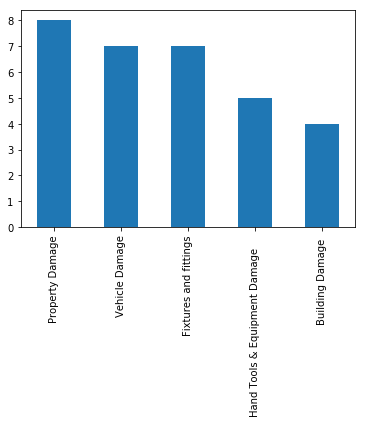

In [14]:
print(final_base_data['Damage Type'].unique())
#sns.distplot(final_base_data['Damage Type'].value_counts())
final_base_data['Damage Type'].value_counts().plot(kind = 'bar')

In [15]:
#community consequence is also too low in the data
del final_base_data['Community Consequence']
#community consequence is also too low in the data


In [16]:
#removing the Hazard classification because the data is null#
del final_base_data['Notifiable Occurrence Type']
del final_base_data['Party affected']

In [17]:
final_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 18 columns):
Business where event occurred               3481 non-null object
Damage Type                                 31 non-null object
Damage/Loss Consequence                     36 non-null object
Date Entered                                3481 non-null datetime64[ns]
Description of immediate action(s) taken    3469 non-null object
Event Date                                  3481 non-null datetime64[ns]
Event Primary Party                         2402 non-null object
Event Severity Level                        3480 non-null object
Event Sign Off Datetime                     3446 non-null datetime64[ns]
Event Status                                3481 non-null object
Event Time                                  3481 non-null object
Event short description                     3481 non-null object
Injury/Illness Consequence                  3480 non-null object
Injury/Illness Mechanism    

In [18]:
del final_base_data['Damage Type']
del final_base_data['Damage/Loss Consequence']

In [23]:
del final_base_data['Potential Risk Level']
final_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 15 columns):
Business where event occurred               3481 non-null object
Date Entered                                3481 non-null datetime64[ns]
Description of immediate action(s) taken    3469 non-null object
Event Date                                  3481 non-null datetime64[ns]
Event Primary Party                         2402 non-null object
Event Severity Level                        3480 non-null object
Event Sign Off Datetime                     3446 non-null datetime64[ns]
Event Status                                3481 non-null object
Event Time                                  3481 non-null object
Event short description                     3481 non-null object
Injury/Illness Consequence                  3480 non-null object
Injury/Illness Mechanism                    3480 non-null object
Party Relationship                          3460 non-null object
Site where event occurre

In [24]:
#final base for exploratory annalytics
final_base_data.head()


,Business where event occurred,Date Entered,Description of immediate action(s) taken,Event Date,Event Primary Party,Event Severity Level,Event Sign Off Datetime,Event Status,Event Time,Event short description,Injury/Illness Consequence,Injury/Illness Mechanism,Party Relationship,Site where event occurred,Subcategory
0,Retail,2018-08-02 15:14:00,First Aid was offered and 000 called,2018-08-02,Member of public/ Visitor,Level 1,NaT,Awaiting Action Plan,11:05:00,An elderly female fell from her wheelchair whi...,First Aid,Falls from a height,Member of public/ Visitor,Toombul Centre,Safety (Injury)
1,Retail,2018-08-02 12:25:00,S1(Azhar Ud din) Radioed S2 (Ali Kabalan) to a...,2018-08-01,Member of public/ Visitor,Level 1,2018-08-02 12:33:09,Closed,19:10:00,INCIDENT REPORT # 205 FIRST AID ASSISTANCE WED...,First Aid,Hitting objects with a part of the body,Member of public/ Visitor,Harbourside S C,Safety (Injury)
2,Retail,2018-08-01 23:00:00,"I, S/O Zaid Al Bangani provided Mrs. Rawhya So...",2018-08-01,Member of public/ Visitor,Level 1,NaT,Awaiting Action Plan,13:31:00,Mrs. Rawhya Soryon Tripped and Fell over Carpa...,First Aid,Falls on the same level (including trips and s...,Member of public/ Visitor,Cherrybrook Village S C,Safety (Injury)
3,Retail,2018-08-01 13:05:00,Requested S2 to meet me at escalator #2 with f...,2018-07-31,Member of public/ Visitor,Level 1,2018-08-01 13:37:15,Closed,21:43:00,INCIDENT REPORT #204 TRIP AND FALL TUESDAY 31....,First Aid,Falls on the same level (including trips and s...,Member of public/ Visitor,Harbourside S C,Safety (Injury)
4,Construction,2018-08-01 13:35:00,Form 700 managment notified. First aid treatem...,2018-07-31,Contractor/ Service provider,Level 1,NaT,Awaiting Action Plan,17:00:00,Small cut to left wrist tying reo bars.,First Aid,Hitting objects with a part of the body,Contractor/ Service provider,VIC Commercial: 477 Collins Street,Safety (Injury)


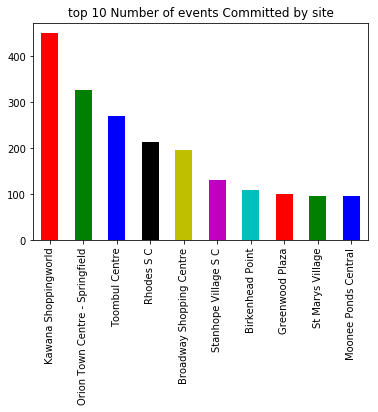

In [33]:
#Create a dataframe that has the number of events occurences by site

sitecount = final_base_data["Site where event occurred"].value_counts()
#Create bar graph of number of crimes by district
my_colors = 'rgbkymc'
sitecount.head(10).plot(kind='bar',
                color=my_colors,
                title='top 10 Number of events Committed by site')

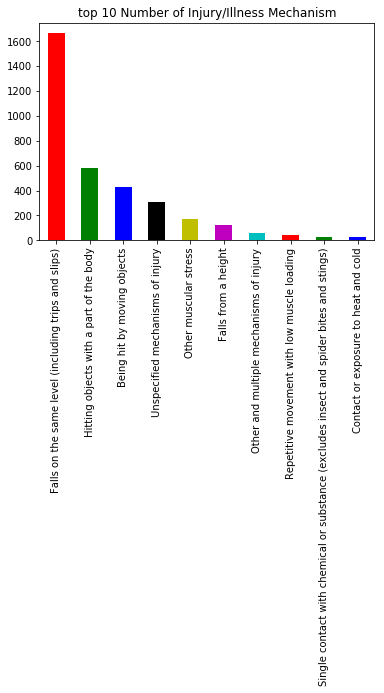

In [34]:
#Create a dataframe that has the top 10 number of injuries occurences 

injury_count = final_base_data["Injury/Illness Mechanism"].value_counts()
#Create bar graph of number of crimes by district
my_colors = 'rgbkymc'
injury_count.head(10).plot(kind='bar',
                color=my_colors,
                title='top 10 Number of Injury/Illness Mechanism')

#exploratory analytics
my_tab = pd.crosstab(index = final_base_data["Site where event occurred"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.head(10).plot.bar()

Text(0.5,1,'event status vs party relatioship for data apart from closed status')

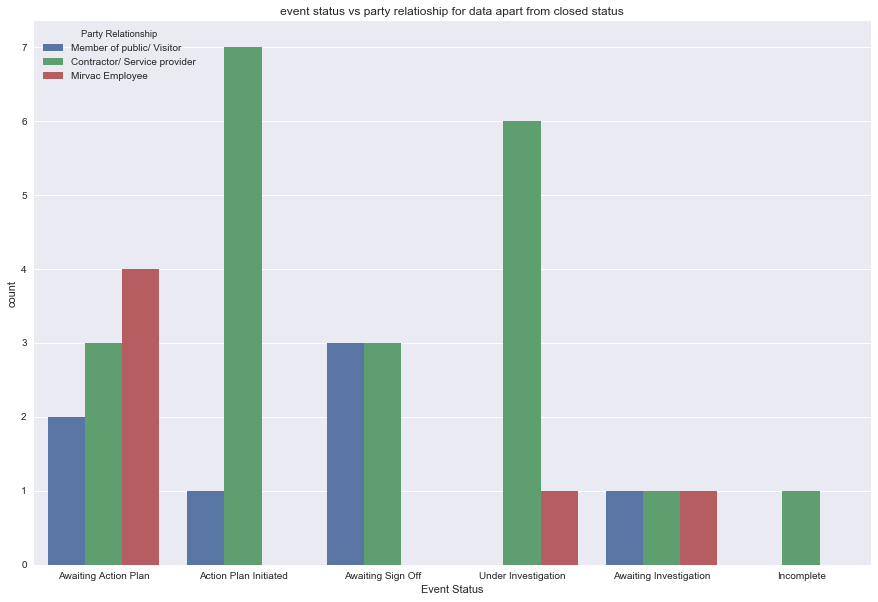

In [51]:
#%matplotlib inline
import matplotlib.pyplot as plt
sns.countplot(x='Event Status',hue='Party Relationship',data=final_base_data[final_base_data['Event Status']!='Closed'])
sns.set(rc={'figure.figsize':(15,10)})
plt.title('event status vs party relatioship for data apart from closed status')

In [69]:
#exploratory analytics
check=final_base_data.groupby('Event Date')['Subcategory'].count()    # Name the count column
check=pd.DataFrame(check)
check['Event Date']=check.index
check.head()
#my_tab.head(10).plot.bar()

,Subcategory,Event Date
Event Date,,
2015-01-01,1,2015-01-01
2015-01-02,4,2015-01-02
2015-01-05,1,2015-01-05
2015-01-06,3,2015-01-06
2015-01-07,4,2015-01-07


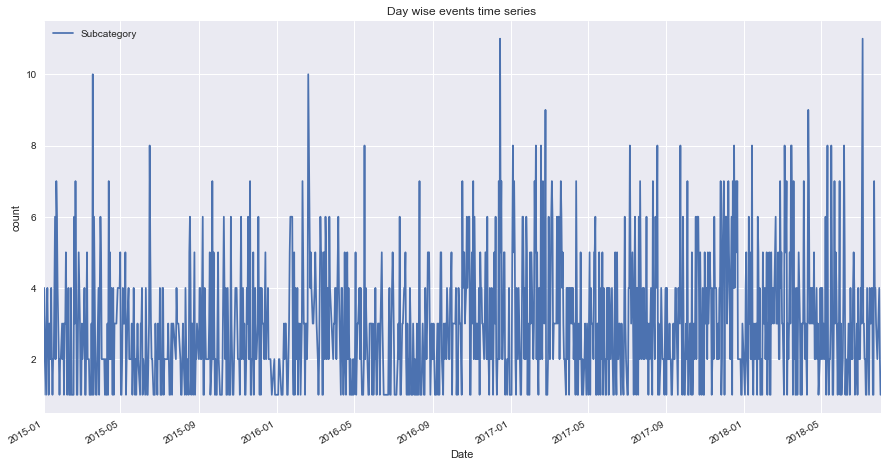

In [73]:
ax = check.set_index('Event Date').plot(figsize=(15, 8))
ax.set_ylabel('count')
ax.set_xlabel('Date')
plt.title('Day wise events time series')
plt.show()